In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import center_and_r_vir, remove_bulk_velocity
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from itertools import izip as zip, count # izip for maximum efficiency
from numpy import linalg as LA

In [2]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
m_p = pynbody.array.SimArray(1.672621e-24, "g")
G = pynbody.array.SimArray(6.6732e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b = pynbody.array.SimArray(1.380622e-16, "g cm**2 s**-2 K**-1")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.380622e-16, "erg K**-1")
c_cgs = pynbody.array.SimArray(2.9979245e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.135667e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6735575e-24, 'g')  # hydrogen mass
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
L_sun = pynbody.array.SimArray(3.839e33, "erg s**-1")
M_sun = pynbody.array.SimArray(2e33, "g")

In [4]:
def make_pdf(s, s_bar, sigma_s):
    pdf = (1./np.sqrt(2*np.pi*(sigma_s**2))) * (np.exp(-0.5*(((s - s_bar)/sigma_s)**2)))
    return pdf

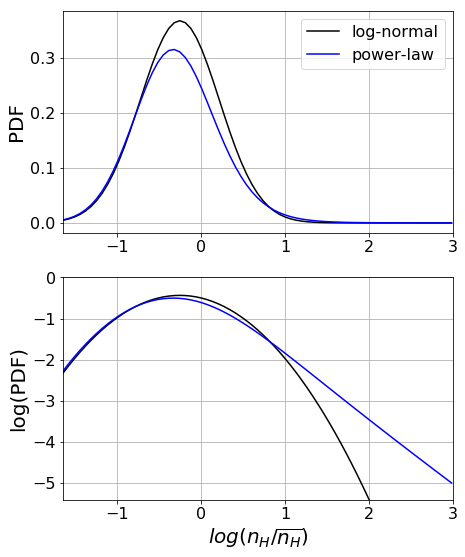

In [8]:
s = np.zeros(100)
pdf = np.zeros(100)
n_H = np.zeros(100)
tau = np.zeros(100)
s_prime = np.zeros(100)
pdf_prime = np.zeros(100)
q = np.zeros(100)

eps = 0.16
mach_no = 5
n_H_mean = 100

sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
    s[i] = smin + i*ds
n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)
a = 1.8614
tau = (1+(2*eps*np.exp(s))-np.sqrt(1+(4*eps*np.exp(s))))/(2*(eps**2)*np.exp(s))
s_prime = np.log(tau)
q = ((1-(eps*np.exp(s_prime)))**3)/(1+(eps*np.exp(s_prime)))
pdf_prime = make_pdf(s_prime, s_bar, sigma_s) * q
norm = np.sum(np.exp(s)*pdf_prime*ds)
pdf_prime = pdf_prime/norm
fig = plt.figure(figsize=(7,9))
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('figure', titlesize=16)  # fontsize of the figure title
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

ax1.plot(np.log10(n_H/n_H_mean), pdf, color="k", label="log-normal")
ax1.plot(np.log10(n_H/n_H_mean), pdf_prime, color = "b", label="power-law")
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color="k")
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf_prime), color = "b")

ax1.set_xlim([-1.65,3])
ax2.set_xlim([-1.65,3])
ax2.set_ylim([-5.4,0])
ax1.legend()
plt.xlabel('$log(n_H/\overline{n_H})$')
ax1.set_ylabel('PDF')
ax2.set_ylabel('log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
# plt.suptitle('$log(n_H/\overline{n_H})$ vs PDF & log(PDF): $\mathcal{M}=5$')
plt.savefig('outputs/for_thesis/svsPDFvslog(PDF)-PDF Evolution-M5.png', 
            dpi=300, bbox_inches='tight')
plt.show()

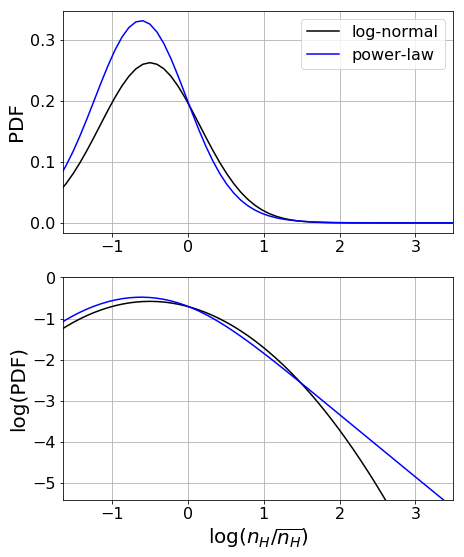

In [9]:
s = np.zeros(100)
pdf = np.zeros(100)
n_H = np.zeros(100)
tau = np.zeros(100)
s_prime = np.zeros(100)
pdf_prime = np.zeros(100)
q = np.zeros(100)

eps = 0.16
mach_no = 10
n_H_mean = 100

sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
    s[i] = smin + i*ds
n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)
a = 1.8614
tau = (1+(2*eps*np.exp(s))-np.sqrt(1+(4*eps*np.exp(s))))/(2*(eps**2)*np.exp(s))
s_prime = np.log(tau)
q = ((1-(eps*np.exp(s_prime)))**3)/(1+(eps*np.exp(s_prime)))
pdf_prime = make_pdf(s_prime, s_bar, sigma_s) * q
norm = np.sum(np.exp(s)*pdf_prime*ds)
pdf_prime = pdf_prime/norm

fig = plt.figure(figsize=(7,9))
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('figure', titlesize=16)  # fontsize of the figure title
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

ax1.plot(np.log10(n_H/n_H_mean), pdf, color="k", label="log-normal")
ax1.plot(np.log10(n_H/n_H_mean), pdf_prime, color = "b", label="power-law")
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color="k")
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf_prime), color = "b")

ax1.set_xlim([-1.65,3.5])
ax2.set_xlim([-1.65,3.5])
ax2.set_ylim([-5.4,0])
ax1.legend()
plt.xlabel(r'$\log(n_H/\overline{n_H})$')
ax1.set_ylabel(r'PDF')
ax2.set_ylabel(r'log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
# plt.suptitle('$log(n_{H}/n_{H,mean})$ vs PDF & log(PDF): Mach=10')
plt.savefig('outputs/for_thesis/svsPDFvslog(PDF)-PDF Evolution-M10.png', 
            dpi=300, bbox_inches='tight')
plt.show()

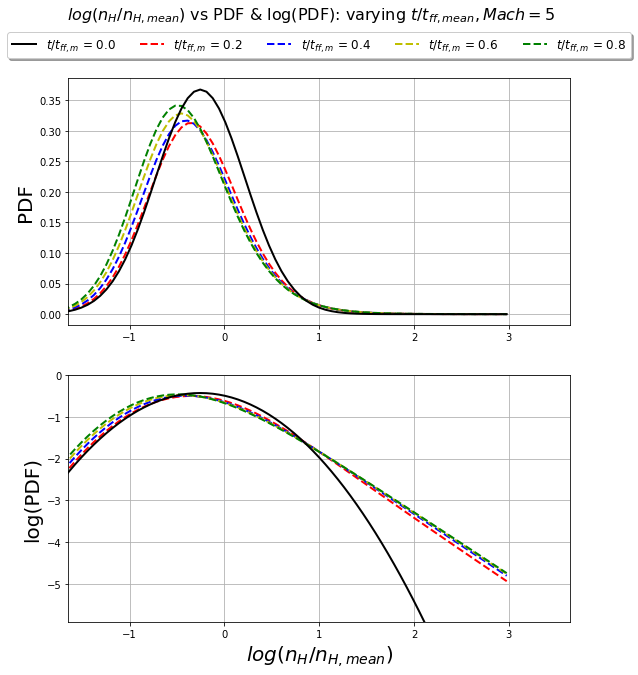

In [60]:
s = np.zeros(100)
pdf = np.zeros(100)
n_H = np.zeros(100)
tau = np.zeros(100)
s_prime = np.zeros(100)
pdf_prime = np.zeros(100)
q = np.zeros(100)

mach_no = 5
n_H_mean = 100
a = 1.8614

sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
    s[i] = smin + i*ds
n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)

fig = plt.figure(figsize=(9,10))
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
label = "$t/t_{ff,m}$ "
color_arr = ['r','b','y','g']
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='r', lw=2, ls='--'),
                Line2D([0], [0], color='b', lw=2, ls='--'),
                Line2D([0], [0], color='y', lw=2, ls='--'),
                Line2D([0], [0], color='g', lw=2, ls='--')]
epsilon = [0.2, 0.4, 0.6, 0.8]
for i in range(0, len(epsilon)):    
    color = str(color_arr[i])
    eps = epsilon[i]
    tau = (1+(2*eps*np.exp(s))-np.sqrt(1+(4*eps*np.exp(s))))/(2*(eps**2)*np.exp(s))
    s_prime = np.log(tau)
    q = ((1-(eps*np.exp(s_prime)))**3)/(1+(eps*np.exp(s_prime)))
    pdf_prime = make_pdf(s_prime, s_bar, sigma_s) * q
    norm = np.sum(np.exp(s)*pdf_prime*ds)
    pdf_prime = pdf_prime/norm
    
    ax1.plot(np.log10(n_H/n_H_mean), pdf_prime, color=color, ls='--', lw=2)
    ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf_prime), color=color, ls='--', lw=2)
ax1.plot(np.log10(n_H/n_H_mean), pdf, color='k', ls='-', lw=2)
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color='k', ls='-', lw=2)
ax1.set_xlim([-1.65,3.65])
ax2.set_xlim([-1.65,3.65])
ax2.set_ylim([-5.9,0])
plt.xlabel('$log(n_{H}/n_{H, mean})$')
ax1.set_ylabel('PDF')
ax2.set_ylabel('log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
fig.suptitle('$log(n_{H}/n_{H, mean})$ vs PDF & log(PDF): varying $t/t_{ff,mean}, Mach=5$')
legend = ax1.legend(  custom_lines,
            [   label + '= 0.0',
                label + '= 0.2',
                label + '= 0.4',
                label + '= 0.6',
                label + '= 0.8' ],
            loc = 'upper center',
            bbox_to_anchor = (0.5, 1.21),
            ncol = 5,
            fancybox = True,
            shadow = True
                )

plt.savefig('outputs/pdf_evolution/svsPDFvslog(PDF)-PDF Evolution-varying ratio-M5.png', 
            dpi=300, bbox_inches='tight')
plt.show()

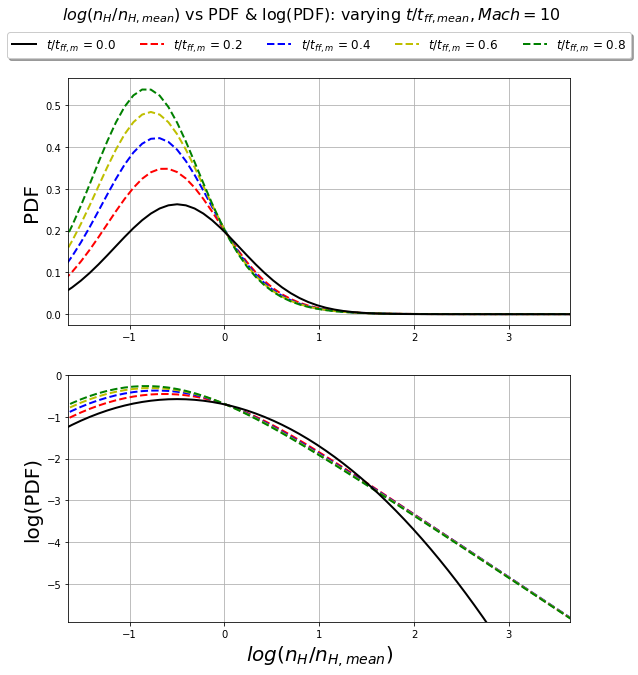

In [59]:
s = np.zeros(100)
pdf = np.zeros(100)
n_H = np.zeros(100)
tau = np.zeros(100)
s_prime = np.zeros(100)
pdf_prime = np.zeros(100)
q = np.zeros(100)

mach_no = 10
n_H_mean = 100
a = 1.8614

sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
    s[i] = smin + i*ds
n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)

fig = plt.figure(figsize=(9,10))
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
label = "$t/t_{ff,m}$ "
color_arr = ['r','b','y','g']
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='r', lw=2, ls='--'),
                Line2D([0], [0], color='b', lw=2, ls='--'),
                Line2D([0], [0], color='y', lw=2, ls='--'),
                Line2D([0], [0], color='g', lw=2, ls='--')]
epsilon = [0.2, 0.4, 0.6, 0.8]
for i in range(0, len(epsilon)):    
    color = str(color_arr[i])
    eps = epsilon[i]
    tau = (1+(2*eps*np.exp(s))-np.sqrt(1+(4*eps*np.exp(s))))/(2*(eps**2)*np.exp(s))
    s_prime = np.log(tau)
    q = ((1-(eps*np.exp(s_prime)))**3)/(1+(eps*np.exp(s_prime)))
    pdf_prime = make_pdf(s_prime, s_bar, sigma_s) * q
    norm = np.sum(np.exp(s)*pdf_prime*ds)
    pdf_prime = pdf_prime/norm
    
    ax1.plot(np.log10(n_H/n_H_mean), pdf_prime, color=color, ls='--', lw=2)
    ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf_prime), color=color, ls='--', lw=2)
ax1.plot(np.log10(n_H/n_H_mean), pdf, color='k', ls='-', lw=2)
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color='k', ls='-', lw=2)
ax1.set_xlim([-1.65,3.65])
ax2.set_xlim([-1.65,3.65])
ax2.set_ylim([-5.9,0])
plt.xlabel('$log(n_{H}/n_{H, mean})$')
ax1.set_ylabel('PDF')
ax2.set_ylabel('log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
fig.suptitle('$log(n_{H}/n_{H, mean})$ vs PDF & log(PDF): varying $t/t_{ff,mean}, Mach=10$')
legend = ax1.legend(  custom_lines,
            [   label + '= 0.0',
                label + '= 0.2',
                label + '= 0.4',
                label + '= 0.6',
                label + '= 0.8' ],
            loc = 'upper center',
            bbox_to_anchor = (0.5, 1.21),
            ncol = 5,
            fancybox = True,
            shadow = True
                )

plt.savefig('outputs/pdf_evolution/svsPDFvslog(PDF)-PDF Evolution-varying ratio-M10.png', 
            dpi=300, bbox_inches='tight')
plt.show()